In [1]:
import numpy as np        
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category = UserWarning)

%matplotlib inline

pd.set_option('display.max_rows', 15)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv('C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Phone_data.csv', parse_dates = True)

#creating a copy for modelling later
data = df.copy()

df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1507,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1508,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1509,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000


# Show the first 5 Rows

In [2]:
df.head()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.0


# show the last 5 rows.

In [3]:
df.tail()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
1506,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1507,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1508,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1509,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000
1510,vivo iQOO Z7 Pro,Vivo,Android 13,6.78,1080x2400,4600,Li-Po,8,31-08-2023,175,...,True,True,False,True,False,False,False,False,False,287.988


# Show the statistical info

In [4]:
df.describe()


,inches,battery,ram(GB),weight(g),storage(GB),price(USD $)
count,1508.000000,1511.000000,1511.000000,1511.000000,1510.000000,1511.000000
mean,6.425438,4390.718729,6.686300,187.669755,109.277483,337.752957
std,0.473677,784.050926,2.700663,26.176353,74.420584,266.804037
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.330000,4000.000000,4.000000,175.000000,64.000000,179.995000
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.500000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


# show the size of DataFrame

In [5]:
df.shape


(1511, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1511 non-null   object 
 1   brand              1511 non-null   object 
 2   os                 1511 non-null   object 
 3   inches             1508 non-null   float64
 4   resolution         1511 non-null   object 
 5   battery            1511 non-null   int64  
 6   battery_type       1511 non-null   object 
 7   ram(GB)            1511 non-null   int64  
 8   announcement_date  1511 non-null   object 
 9   weight(g)          1511 non-null   int64  
 10  storage(GB)        1510 non-null   float64
 11  video_720p         1511 non-null   bool   
 12  video_1080p        1511 non-null   bool   
 13  video_4K           1511 non-null   bool   
 14  video_8K           1511 non-null   bool   
 15  video_30fps        1511 non-null   bool   
 16  video_60fps        1511 

# Aggregation functions

### 1) sum ()
### 2) mean ()
### 3) min ()
### 4) max ()
### 5) std ()


In [7]:
a=df['price(USD $)'].sum()
print("Sum of Price is :",a)

Sum of Price is : 510344.71800000005


In [8]:
b=df['price(USD $)'].mean()
print("mean of Price is :",b)

mean of Price is : 337.7529569821311


In [9]:
c=df['price(USD $)'].max()
print("Maximum value in Price is :",c)

Maximum value in Price is : 2300.0


In [10]:
d=df['price(USD $)'].min()
print("Minimum value in Price is :",d)

Minimum value in Price is : 40.0


In [11]:
e=df['price(USD $)'].std()
print('standerd diviation of Price is :',e)

standerd diviation of Price is : 266.80403693962774


In [12]:
df['price(USD $)'].agg(['sum','mean','max','min','std'])

sum     510344.718000
mean       337.752957
max       2300.000000
min         40.000000
std        266.804037
Name: price(USD $), dtype: float64

# Vectorized Operations

### 1) map ()
### 2) filter ()
### 3) reduce ()
### 4) lambda ()


# map()

In [13]:
# Add a Price extra 2$ using map function

n1=df['price(USD $)']
se=list(map(lambda n:n+2,n1))
print(se)


[122.0, 102.0, 422.0, 152.0, 422.0, 142.0, 422.0, 172.0, 252.0, 172.0, 132.0, 222.0, 322.0, 112.0, 252.0, 252.0, 352.0, 172.0, 352.0, 172.0, 282.0, 162.0, 332.0, 242.0, 92.0, 162.0, 142.0, 232.0, 242.0, 202.0, 112.0, 92.0, 252.0, 182.0, 252.0, 252.0, 252.0, 202.0, 132.0, 202.0, 82.0, 132.0, 252.0, 112.0, 202.0, 432.0, 202.0, 252.0, 302.0, 502.0, 152.0, 202.0, 212.0, 202.0, 262.0, 172.0, 412.0, 282.0, 202.0, 552.0, 182.0, 212.0, 282.0, 262.0, 152.0, 170.0, 152.0, 182.0, 502.0, 302.0, 192.0, 612.0, 522.0, 142.0, 402.0, 312.0, 92.0, 172.0, 102.0, 232.0, 162.0, 202.0, 452.0, 232.0, 122.0, 192.0, 262.0, 502.0, 202.0, 202.0, 502.0, 252.0, 142.0, 432.0, 102.0, 142.0, 182.0, 282.0, 72.0, 182.0, 302.0, 122.0, 362.0, 272.0, 182.0, 182.0, 452.0, 322.0, 372.0, 602.0, 152.0, 152.0, 202.0, 232.0, 172.0, 182.0, 582.0, 222.0, 242.0, 152.0, 152.0, 172.0, 332.0, 412.0, 462.0, 422.0, 122.0, 282.0, 402.0, 132.0, 312.0, 202.0, 1302.0, 142.0, 232.0, 222.0, 242.0, 172.0, 112.0, 152.0, 182.0, 152.0, 372.0, 20

# 2. filter()

In [14]:
# check price grater then 500$ using filter function

# 1)

def pri(a):
    if a>500:
        return True
    
l1=df['price(USD $)']
f=list(filter(pri,l1))
f


[550.0,
 610.0,
 520.0,
 600.0,
 580.0,
 1300.0,
 510.0,
 510.0,
 510.0,
 570.0,
 730.0,
 1350.0,
 550.0,
 800.0,
 550.0,
 1200.0,
 700.0,
 580.0,
 530.0,
 590.0,
 560.0,
 600.0,
 600.0,
 590.0,
 800.0,
 670.0,
 550.0,
 550.0,
 760.0,
 1100.0,
 590.0,
 700.0,
 590.0,
 880.0,
 1020.0,
 1750.0,
 600.0,
 650.0,
 1400.0,
 550.0,
 560.0,
 1290.0,
 1700.0,
 1030.0,
 800.0,
 1440.0,
 2150.0,
 1020.0,
 680.0,
 770.0,
 880.0,
 540.0,
 540.0,
 550.0,
 930.0,
 1100.0,
 700.0,
 700.0,
 2000.0,
 690.0,
 700.0,
 1950.0,
 1000.0,
 940.0,
 650.0,
 520.0,
 569.9,
 740.0,
 650.0,
 876.0,
 650.0,
 670.0,
 1170.0,
 540.0,
 520.0,
 535.0,
 870.0,
 820.0,
 510.0,
 600.0,
 1349.0,
 850.0,
 800.0,
 1250.0,
 850.0,
 650.0,
 960.0,
 1000.0,
 590.0,
 650.0,
 850.0,
 567.86,
 607.0,
 1298.67,
 868.24,
 640.0,
 790.0,
 630.0,
 1400.0,
 680.0,
 1400.0,
 529.0,
 792.43,
 539.47,
 666.9,
 600.0,
 2300.0,
 1300.0,
 930.0,
 550.0,
 1500.0,
 525.0,
 561.25,
 600.0,
 880.0,
 800.0,
 520.0,
 589.99,
 517.28,
 746.0,
 600.

# 3. Reduce

In [15]:
# Reduce function

from functools import reduce
def add(x,y):
    return x+y
l1=df['ram(GB)']
res=reduce(add,l1)
res

10103

# 4. Lambda

# Are there any null or missing values?

In [16]:
df.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD $)'],
      dtype='object')

In [17]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          3
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

# Fill the missing values using mean.

In [18]:
a=df['inches'].mean()
a

np.float64(6.425437665782493)

In [19]:
df['inches']=df['inches'].fillna(a)
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1507,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1508,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1509,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000


In [36]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          0
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

# Are there any duplicates?

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.phone_name.value_counts(ascending = False)

phone_name
V30                   3
8 Pro                 2
10                    2
K9                    2
8                     2
                     ..
vivo Y27              1
Legion Y700 (2023)    1
C51                   1
K11                   1
P10 Plus              1
Name: count, Length: 1496, dtype: int64

In [39]:
df.loc[df['storage(GB)'] == 1.0, 'storage(GB)'] = 1024.0
numerical = df.select_dtypes(['number'])
numerical.head()


,inches,battery,ram(GB),weight(g),storage(GB),price(USD $)
0,5.0,2200,2,140,16.0,120.0
1,5.3,2700,2,140,16.0,100.0
2,5.2,3000,4,147,16.0,420.0
3,5.5,4100,4,165,32.0,150.0
4,5.1,3200,4,145,32.0,420.0


					  Grid of Boxplots for Numerical Columns 


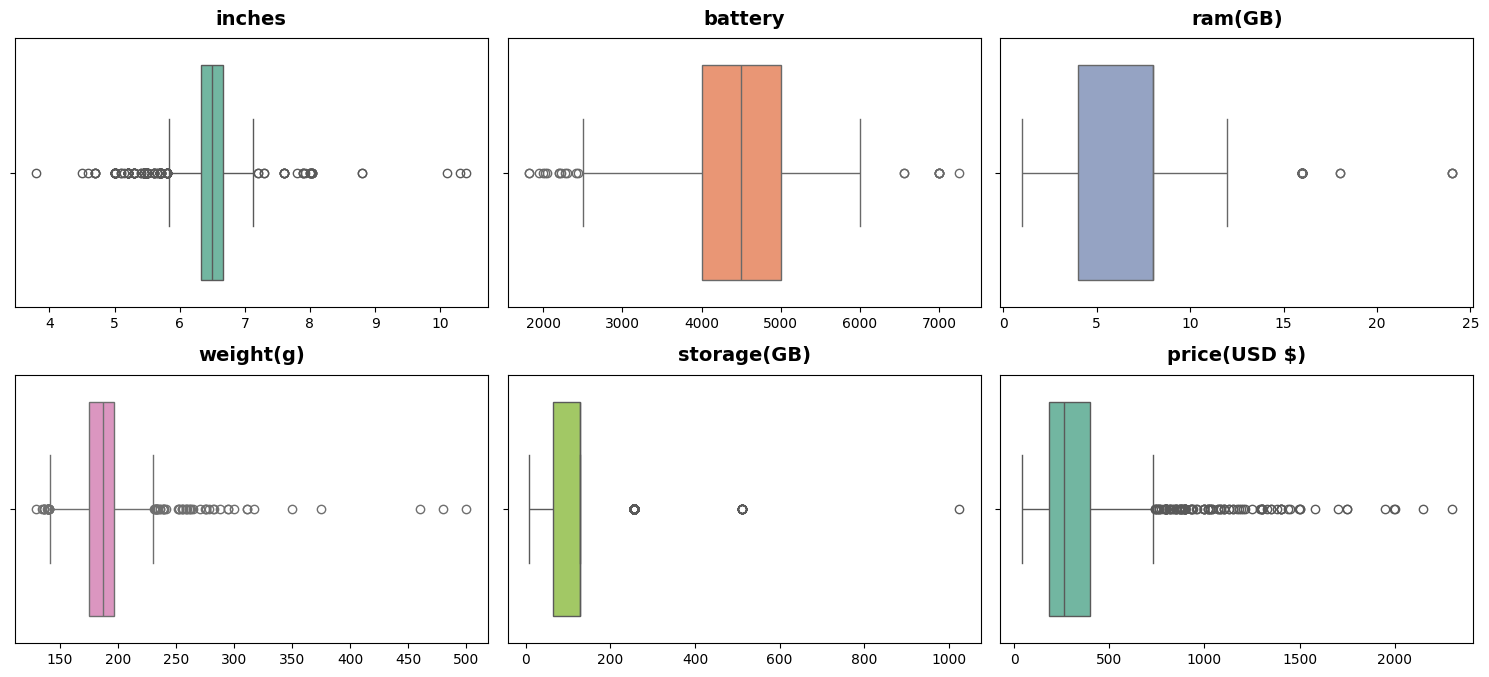

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\t\t\t\t\t  Grid of Boxplots for Numerical Columns ')

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
colors = sns.color_palette("Set2", n_colors=5)
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax=axes[i], color = colors[i % len(colors)])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')  #for spacing

for i in range(len(numerical.columns), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# checking the outliers

<Axes: >

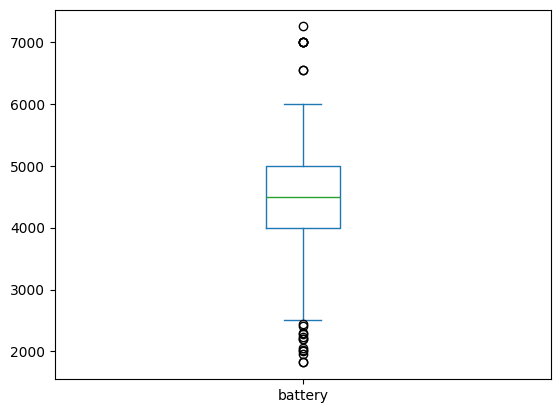

In [16]:
df["battery"].plot(kind='box')

# Replace the outliers using IQR method

In [17]:
q1=df['battery'].quantile(0.25)
q3=df['battery'].quantile(0.75)
iqr=q3-q1

In [18]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [19]:
bat_arr=df['battery']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

0       2200
5       2300
19      2500
27      2200
28      2050
        ... 
948     2438
1085    6550
1095    2018
1448    7000
1492    6550
Name: battery, Length: 26, dtype: int64


In [20]:
batt_arr=df['battery']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

In [21]:
for i in df['battery']:
    if i <lower_bound:
        df['battery']=df['battery'].replace(i,lower_cap)
    elif i >upper_bound:
        df['battery']=df['battery'].replace(i,upper_cap)

<Axes: >

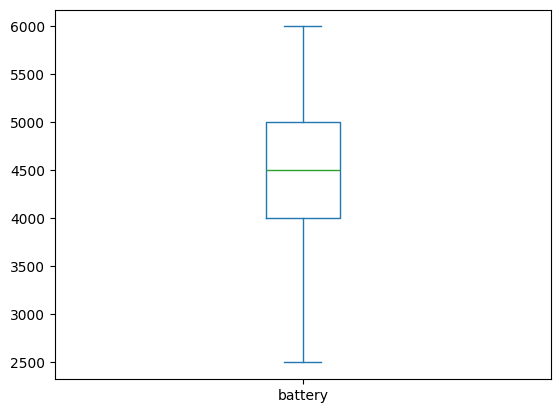

In [22]:
df["battery"].plot(kind='box')

# plot the graphs using matplotlib

# bar graph

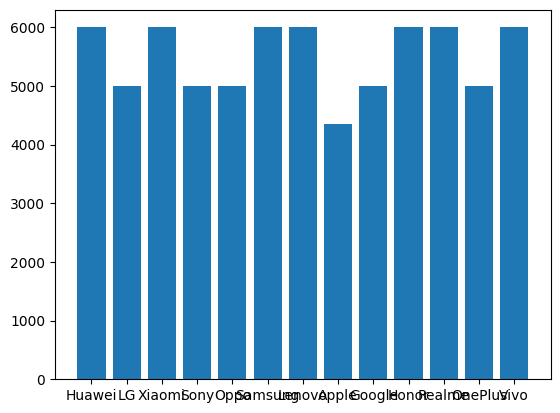

In [23]:
plt.bar(df['brand'],df['battery'])
plt.show()

# bar graph using value count

In [24]:
b=(df["brand"].value_counts())
b

brand
Xiaomi     264
Oppo       213
Samsung    206
Vivo       168
Realme     157
Huawei     137
Honor      124
LG          75
OnePlus     47
Lenovo      43
Sony        37
Apple       22
Google      19
Name: count, dtype: int64

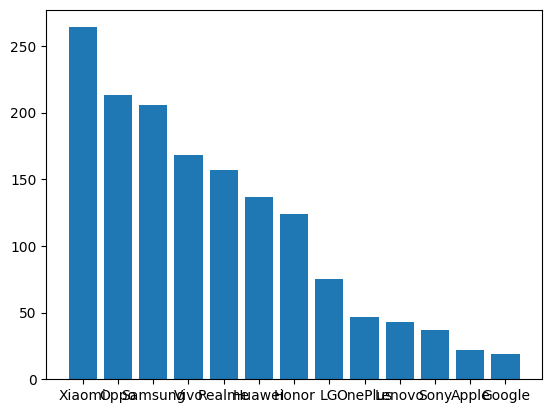

In [25]:
plt.bar(b.index,b.values)
plt.show()

# Plot a pie chart

In [26]:
c=df['battery_type'].value_counts().sort_index()
c

battery_type
Li-Ion     270
Li-Po     1242
Name: count, dtype: int64

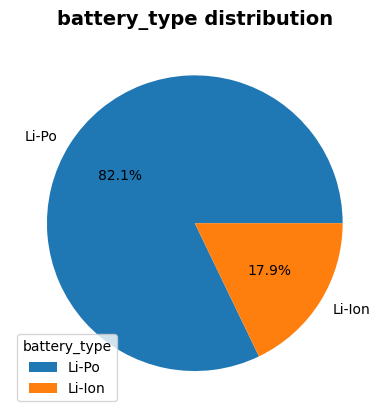

In [27]:
bc=df['battery_type'].value_counts()
plt.pie(bc,labels=bc.index,autopct='%1.1f%%')
plt.legend(labels=bc.index,title='battery_type',loc="best")
plt.title("battery_type distribution")
plt.show()

# plot a line graph

In [28]:
df["ram(GB)"].unique()

array([ 2,  4,  3,  6,  5,  1,  8, 10, 12, 16, 18, 24])

# Line Graph

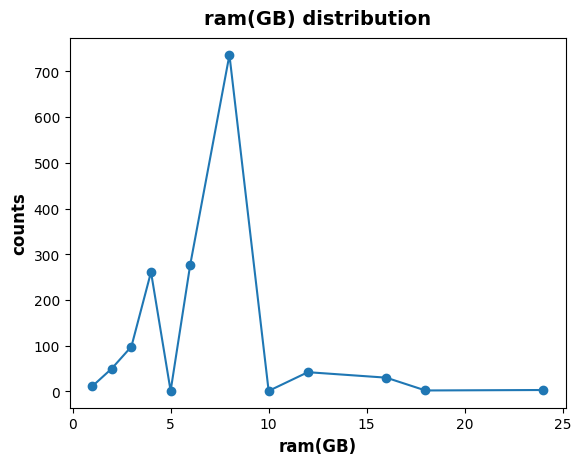

In [47]:
rc=df.groupby("ram(GB)").size()
plt.plot(rc.index,rc.values,marker="o")
plt.xlabel("ram(GB)")
plt.ylabel("counts")
plt.title("ram(GB) distribution")
plt.show()

# Scatter plot for battery column

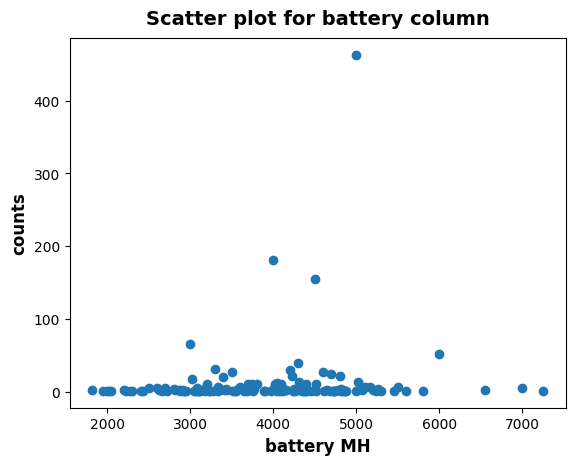

In [49]:
d=df["battery"].value_counts()
plt.scatter(d.index,d.values)
plt.xlabel('battery MH')
plt.ylabel("counts")
plt.title("Scatter plot for battery column")
plt.show()

# Histogram

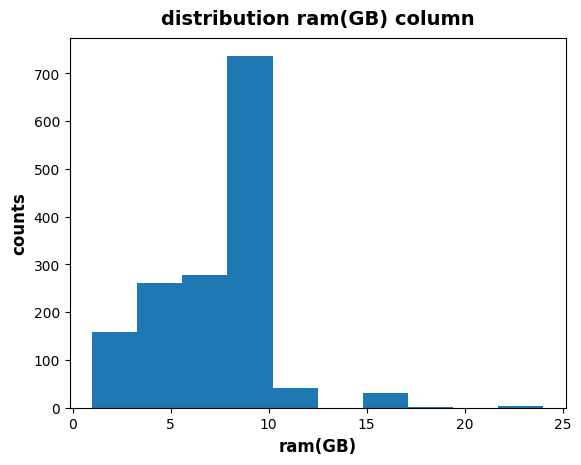

In [31]:
plt.hist(df['ram(GB)'])
plt.xlabel("ram(GB)")
plt.ylabel("counts")
plt.title("distribution ram(GB) column")
plt.show()

# Adding new column

In [18]:
df['exatra_ram']=df["ram(GB)"]+4
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $),exatra_ram
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,True,False,False,False,False,False,120.000,6
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,False,False,True,False,False,False,False,False,100.000,6
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,False,False,True,False,False,False,False,False,420.000,8
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,False,False,True,False,True,False,False,False,150.000,8
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,False,True,True,False,False,False,False,420.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,False,False,True,False,False,False,False,False,170.000,12
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,False,False,True,False,False,False,False,False,182.880,12
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,False,False,True,False,False,False,False,380.000,20
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,False,False,True,False,False,False,False,470.000,28


In [19]:
df.drop(["video_8K",'video_120fps','video_960fps'],axis=1,inplace=True)

In [20]:
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_30fps,video_60fps,video_240fps,video_480fps,price(USD $),exatra_ram
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,16.0,True,False,False,True,False,False,False,120.000,6
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,16.0,False,True,False,True,False,False,False,100.000,6
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,16.0,False,True,False,True,False,False,False,420.000,8
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,32.0,True,True,False,True,False,False,False,150.000,8
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,32.0,True,True,True,True,True,False,False,420.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,256.0,False,True,False,True,False,False,False,170.000,12
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,128.0,False,True,False,True,False,False,False,182.880,12
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,256.0,True,True,True,False,True,False,False,380.000,20
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,1.0,True,True,True,False,True,False,False,470.000,28


In [23]:
df.drop(['video_4K','video_480fps','exatra_ram'],axis=1,inplace=True)

KeyError: "['exatra_ram'] not found in axis"

# Drop the column

In [ ]:
df.head()

In [ ]:
df

# How are the battery types distributed?

In [ ]:
sns.set_style('white')
sns.countplot(data = df, x = 'battery_type')
plt.title('Battery Types Distribution')
plt.show()

In [66]:
video_dist = df[['video_720p', 'video_1080p',
       'video_4K','video_30fps', 'video_60fps',
       'video_240fps', 'video_480fps']].sum()
video_dist

KeyError: "None of [Index(['video_720p', 'video_1080p', 'video_4K', 'video_30fps', 'video_60fps',\n       'video_240fps', 'video_480fps'],\n      dtype='object')] are in the [columns]"

NameError: name 'video_dist' is not defined

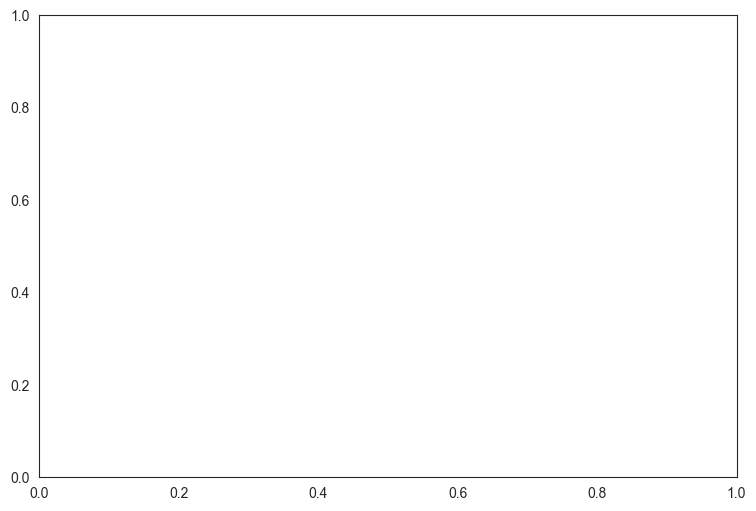

In [67]:
plt.subplots(figsize = (9, 6))
sns.set_style('dark')
sns.barplot(x = video_dist.index, y = video_dist.values)

plt.title('Distribution of Video Capabilities')
plt.xticks(rotation = 60)
plt.tight_layout()
plt.xlabel(" ")
plt.ylabel("Counts")
plt.show()

In [ ]:
sns.countplot(data = df, x = 'brand')
plt.show()

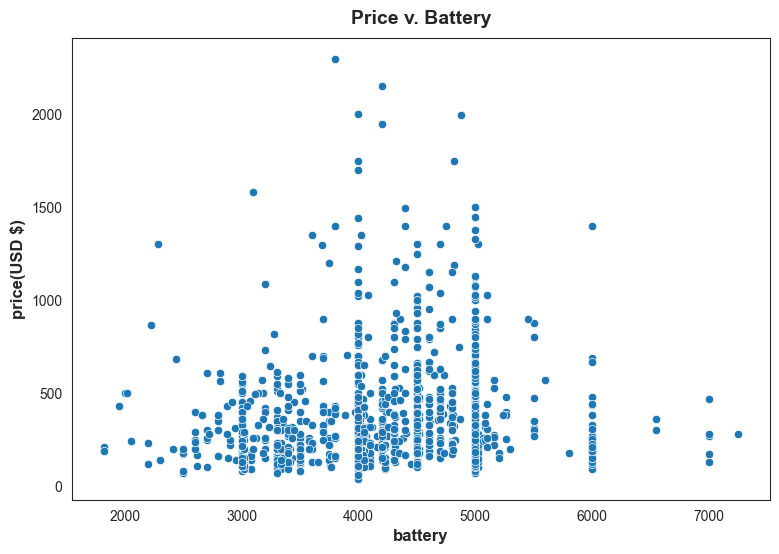

In [25]:
plt.figure(figsize = (9, 6))
sns.set_style('white')
sns.scatterplot(data = df, x = 'battery', y = 'price(USD $)')
plt.title('Price v. Battery')
plt.show()

In [26]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          0
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

# Splitting Data

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [28]:
y=df['price(USD $)']
x=df.drop('price(USD $)',axis=1)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [30]:
model= LinearRegression()
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Reno4 Lite'

In [31]:
model = LinearRegression()
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Reno4 Lite'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1511 non-null   object 
 1   brand              1511 non-null   object 
 2   os                 1511 non-null   object 
 3   inches             1511 non-null   float64
 4   resolution         1511 non-null   object 
 5   battery            1511 non-null   int64  
 6   battery_type       1511 non-null   object 
 7   ram(GB)            1511 non-null   int64  
 8   announcement_date  1511 non-null   object 
 9   weight(g)          1511 non-null   int64  
 10  storage(GB)        1510 non-null   float64
 11  video_720p         1511 non-null   bool   
 12  video_1080p        1511 non-null   bool   
 13  video_4K           1511 non-null   bool   
 14  video_8K           1511 non-null   bool   
 15  video_30fps        1511 non-null   bool   
 16  video_60fps        1511 

In [33]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.0


In [34]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.0


In [35]:
d=df[['brand','inches','resolution','battery','announcement_date','weight(g)','video_1080p','video_4K','video_8K','video_30fps','video_60fps','video_120fps','video_240fps','video_480fps','video_960fps']]
df.drop(d,axis=1,inplace=True)

In [36]:
k=df[['video_720p']]
df.drop(k,axis=1,inplace=True)

In [37]:
df

,phone_name,os,battery_type,ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Android 5.1,Li-Po,2,16.0,120.000
1,K20 plus,Android 7.0,Li-Ion,2,16.0,100.000
2,P8 Lite (2017),Android 7.0,Li-Ion,4,16.0,420.000
3,Redmi Note 4,Android 6.0,Li-Po,4,32.0,150.000
4,P10,Android 7.0,Li-Ion,4,32.0,420.000
...,...,...,...,...,...,...
1506,vivo Y77t,Android 13,Li-Po,8,256.0,170.000
1507,11x,Android 13,Li-Po,8,128.0,182.880
1508,GT5,Android 13,Li-Po,16,256.0,380.000
1509,GT5 240W,Android 13,Li-Po,24,1.0,470.000


In [45]:
x=df[['phone_name','os','battery_type','ram(GB)','storage(GB)']]
y=df['price(USD $)']

In [46]:
x

,phone_name,os,battery_type,ram(GB),storage(GB)
0,Y6II Compact,Android 5.1,Li-Po,2,16.0
1,K20 plus,Android 7.0,Li-Ion,2,16.0
2,P8 Lite (2017),Android 7.0,Li-Ion,4,16.0
3,Redmi Note 4,Android 6.0,Li-Po,4,32.0
4,P10,Android 7.0,Li-Ion,4,32.0
...,...,...,...,...,...
1506,vivo Y77t,Android 13,Li-Po,8,256.0
1507,11x,Android 13,Li-Po,8,128.0
1508,GT5,Android 13,Li-Po,16,256.0
1509,GT5 240W,Android 13,Li-Po,24,1.0


In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [49]:
X_train

,phone_name,os,battery_type,ram(GB),storage(GB)
678,Reno4 Lite,Android 10,Li-Po,8,128.0
1105,Galaxy A73 5G,Android 12,Li-Po,8,128.0
1030,12 Pro,Android 12,Li-Po,8,128.0
1344,vivo S16e,Android 11,Li-Po,8,128.0
691,Galaxy F41,Android 10,Li-Po,6,64.0
...,...,...,...,...,...
1417,GT Neo5 SE,Android 13,Li-Po,8,256.0
75,R11s Plus,Android 7.1.1,Li-Po,6,64.0
599,C11,Android 10,Li-Po,3,32.0
1361,vivo Y55s (2023),Android 12,Li-Po,6,128.0


In [50]:
X_test

,phone_name,os,battery_type,ram(GB),storage(GB)
624,Redmi 9 Prime,Android 10,Li-Po,4,64.0
666,Reno4 SE,Android 10,Li-Po,8,128.0
1334,vivo Y35 5G,Android 13,Li-Po,8,128.0
379,Galaxy A90 5G,Android 9.0,Li-Po,8,128.0
70,Mate 10 Porsche Design,Android 8.0,Li-Po,6,256.0
...,...,...,...,...,...
337,P20 lite (2019),Android 9.0,Li-Po,4,64.0
1407,Redmi Note 12 4G,Android 13,Li-Po,8,64.0
26,nova 2,Android 7.0,Li-Po,4,64.0
1484,Reno10 Pro,Android 13,Li-Po,12,256.0


In [51]:
Y_test

624     127.188
666     390.000
1334    659.988
379     290.000
70      190.000
         ...   
337     670.000
1407    160.000
26      140.000
1484    479.000
56      410.000
Name: price(USD $), Length: 303, dtype: float64

In [52]:
Y_train

678     168.92
1105    399.50
1030    620.96
1344    800.00
691     330.00
         ...  
1417    270.00
75      310.00
599     126.99
1361    400.00
863     188.41
Name: price(USD $), Length: 1208, dtype: float64

In [53]:
vect=TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_ter=vect.fit_transform(X_train)
X_tes=vect.fit_transform(X_test)

In [54]:
print(X_ter)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (5, 8)>
  Coords	Values
  (0, 3)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 4)	0.6141889663426562
  (3, 1)	0.49552379079705033
  (3, 5)	0.6141889663426562
  (4, 1)	0.49552379079705033
  (4, 6)	0.6141889663426562
  (4, 7)	0.6141889663426562


In [55]:
X_train_com=hstack([X_ter.reshape(-1,1)])
X_test_com=hstack([X_tes.reshape(-1,1)])

In [56]:
print(X_train_com)

<COOrdinate sparse matrix of dtype 'float64'
	with 9 stored elements and shape (40, 1)>
  Coords	Values
  (3, 0)	1.0
  (10, 0)	1.0
  (16, 0)	1.0
  (28, 0)	0.6141889663426562
  (25, 0)	0.49552379079705033
  (29, 0)	0.6141889663426562
  (33, 0)	0.49552379079705033
  (38, 0)	0.6141889663426562
  (39, 0)	0.6141889663426562


In [64]:
model = LinearRegression()
model.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Reno4 Lite'

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   phone_name    1511 non-null   object 
 1   os            1511 non-null   object 
 2   battery_type  1511 non-null   object 
 3   ram(GB)       1511 non-null   int64  
 4   storage(GB)   1510 non-null   float64
 5   video_720p    1511 non-null   bool   
 6   price(USD $)  1511 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 72.4+ KB


In [145]:
df.head()

,phone_name,os,battery_type,ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Android 5.1,Li-Po,2,16.0,120.0
1,K20 plus,Android 7.0,Li-Ion,2,16.0,100.0
2,P8 Lite (2017),Android 7.0,Li-Ion,4,16.0,420.0
3,Redmi Note 4,Android 6.0,Li-Po,4,32.0,150.0
4,P10,Android 7.0,Li-Ion,4,32.0,420.0


In [63]:
l1=LabelEncoder()
data['phone_name']=l1.fit_transform(data['phone_name'])

In [59]:
l2=LabelEncoder()
data['os']=l2.fit_transform(data['os'])

In [60]:
l3=LabelEncoder()
data['battery_type']=l3.fit_transform(data['battery_type'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   phone_name    1511 non-null   object 
 1   os            1511 non-null   object 
 2   battery_type  1511 non-null   object 
 3   ram(GB)       1511 non-null   int64  
 4   storage(GB)   1510 non-null   float64
 5   price(USD $)  1511 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 71.0+ KB


In [65]:
print(data.columns)

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD $)'],
      dtype='object')
